<a href="https://colab.research.google.com/github/FcoFraguas1987/DS_ML_Portfolio/blob/DS_ML_Bioinformatics/Aprendizaje_No_Supervisado_Clustering_Reglas_Asociacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APRENDIZAJE NO SPUERVISADO: Clustering y Reglas de Asociación

--------------------------------------------------------------------------------

Vamos a trabajar con una amtriz donde aparecen datos de genes expresado. Esto datos han sido normalizados para que el proceso pueda ser estudiado mediante el ML.




In [ ]:
#Instalamos las biliotecas
!pip install fastcluster
!pip install yellowbrick

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.0/194.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
#Obtenemos los datos

import pandas as pd

url_datos = 'https://drive.google.com/uc?id=1OzVlp4RsT63W6d18_Zc5WmUonLXMDNL8'
raw_data = pd.read_csv(url_datos, delimiter='\t')

raw_data

TCGA-D9-A4Z6-06  TCGA-EE-A2MQ-06  TCGA-EE-A3AF-06  TCGA-ER-A19F-06  \
TYRP1            7.941545         2.750463        -5.566030        -4.907263   
RPS4Y1           3.475878        -9.252088        -8.781994        -1.866586   
KRT6A           -2.734785         0.420073         0.026095         0.850417   
XIST            -2.903056         8.320289         6.928525        -3.042341   
KRT14           -3.653679        -2.898792        -0.531967         0.375261   
...                   ...              ...              ...              ...   
PKIA            -1.922342        -2.127497         0.448158         0.625836   
EBF3             5.692378         0.087663        -0.577546        -1.479500   
TMEM100         -0.362261        -0.211399        -1.015896        -2.361179   
PLEKHG4B         5.755474         0.199884         0.992465        -1.441778   
SLA2            -2.970178        -0.390041         0.730184        -1.370144   

          TCGA-EE-A2MF-06  TCGA-EE-A2MJ-06  TCGA-BF-AAP4-01  TCGA-D3-A8GM-06  \
TYRP1            5.546815         7.036795         1.296667         8.453333   
RPS4Y1          -7.544166         0.983460         3.230248         1.556010   
KRT6A           -2.374815         3.097854         2.583622        -2.734785   
XIST             9.475711        -3.487538        -2.690857        -3.487538   
KRT14           -0.798866         1.482611         1.573041        -3.232954   
...                   ...              ...              ...              ...   
PKIA            -2.786388         1.134153        -0.642194        -1.485640   
EBF3            -2.187748         1.941861         0.008428        -0.670875   
TMEM100         -1.713450         1.505314        -0.132976        -0.761052   
PLEKHG4B        -2.361887         1.763763         0.966931         7.637215   
SLA2            -0.416322         2.821924         1.797944         0.708631   

          TCGA-GN-A26A-06  TCGA-EB-A3XE-01  ...  TCGA-D3-A5GT-01  \
TYRP1           -4.295078        -2.822735  ...        -5.381279   
RPS4Y1          -8.687076        -8.216183  ...        -1.520994   
KRT6A           -1.190053        13.664241  ...         0.870353   
XIST             8.461294         6.168198  ...        -2.684642   
KRT14            0.714726        13.313004  ...         2.555209   
...                   ...              ...  ...              ...   
PKIA             1.812315        -0.673633  ...        -4.025085   
EBF3            -1.111173         0.183837  ...        -0.624155   
TMEM100          5.336592         0.017804  ...        -1.045497   
PLEKHG4B         1.254673         2.629747  ...         0.407197   
SLA2             0.417630         0.812380  ...        -2.492528   

          TCGA-YD-A89C-06  TCGA-EE-A17Z-06  TCGA-XV-A9W2-01  TCGA-EB-A430-01  \
TYRP1           -6.237240         7.915840         3.779928         6.734718   
RPS4Y1          -9.252088         3.778016         1.443371        -2.361096   
KRT6A           -2.734785         8.260159        15.446076        -2.734785   
XIST             9.090101        -0.091995        -2.608695        -3.487538   
KRT14           -3.653679         5.738394        15.233903        -2.460728   
...                   ...              ...              ...              ...   
PKIA             1.226281         2.410779         2.271258         0.317904   
EBF3            -1.099817        -1.130384        -0.812926        -2.169290   
TMEM100          0.627124        -1.558283        -0.245679        -1.644759   
PLEKHG4B        -0.376975         2.711478         0.520929         6.016236   
SLA2            -2.762855        -2.655847        -1.506646         0.050671   

          TCGA-D3-A3MU-06  TCGA-EE-A2GO-06  TCGA-FR-A8YC-06  TCGA-DA-A1I2-06  \
TYRP1            6.534291        -4.484409        -3.302968        -0.236019   
RPS4Y1           2.837606        -8.125909         4.484682        -1.552534   
KRT6A            0.906310         3.794611        -2.734785        -2.

## 1 Clustering jerárquico
El clustering jerárquico va a organizar los datos según la medida de distancia utilizada por el algoritmo. Agrupará datos con distancias muy pequeñas entre sí.

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


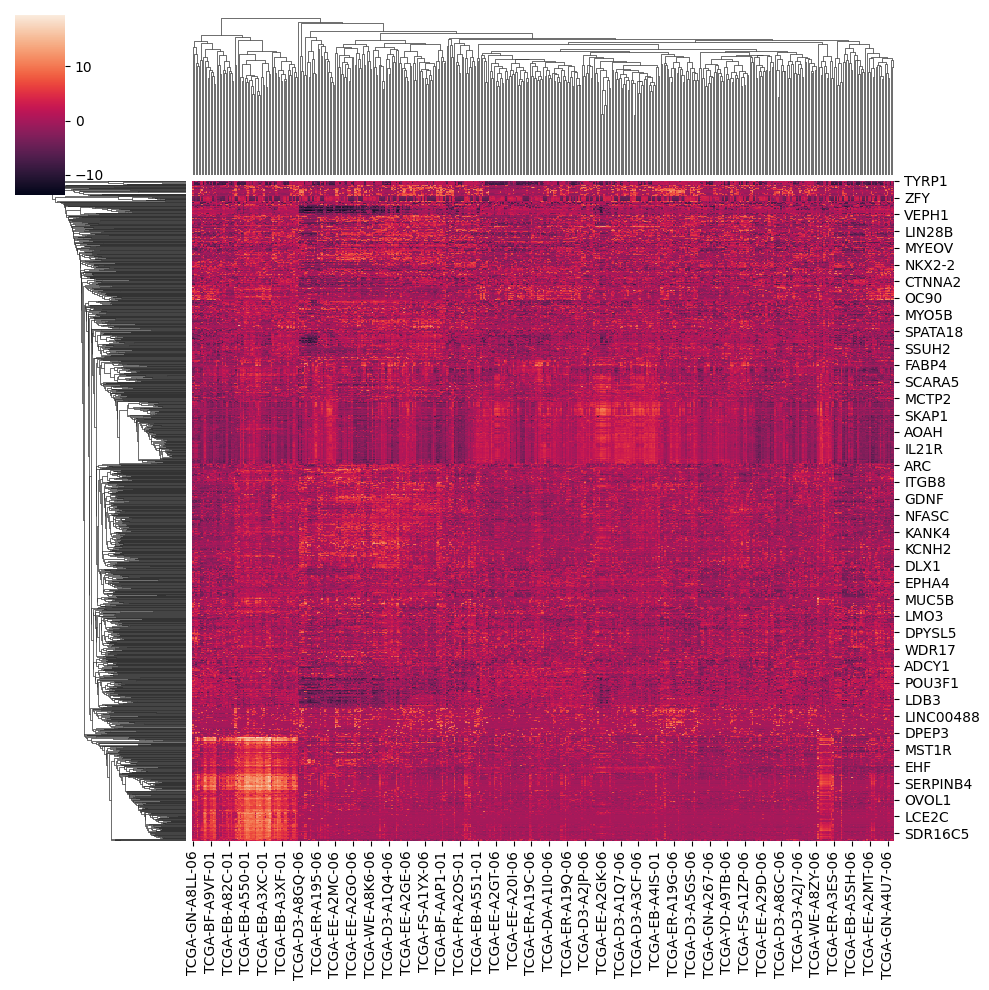

In [ ]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

# Representación gráfica
sns.clustermap(raw_data)

El dendograma resultante, junto con el *heatmap* permite ver algunas correlaciones entre genes y muestra. En la zona media del mapa aparecen unos genes con perfiles similares para todas las muestras, que bien podrían ser de procesos que no se ven modificados por el estado clínico. En la zona inferior vemos claramente dos grupos de muestras para los últimos genes. Este estudio global debería realizarse por diferentes particiones para poder apreciar más la localización de genes y muestras de los patrones que nos muestra el *heatmap*.

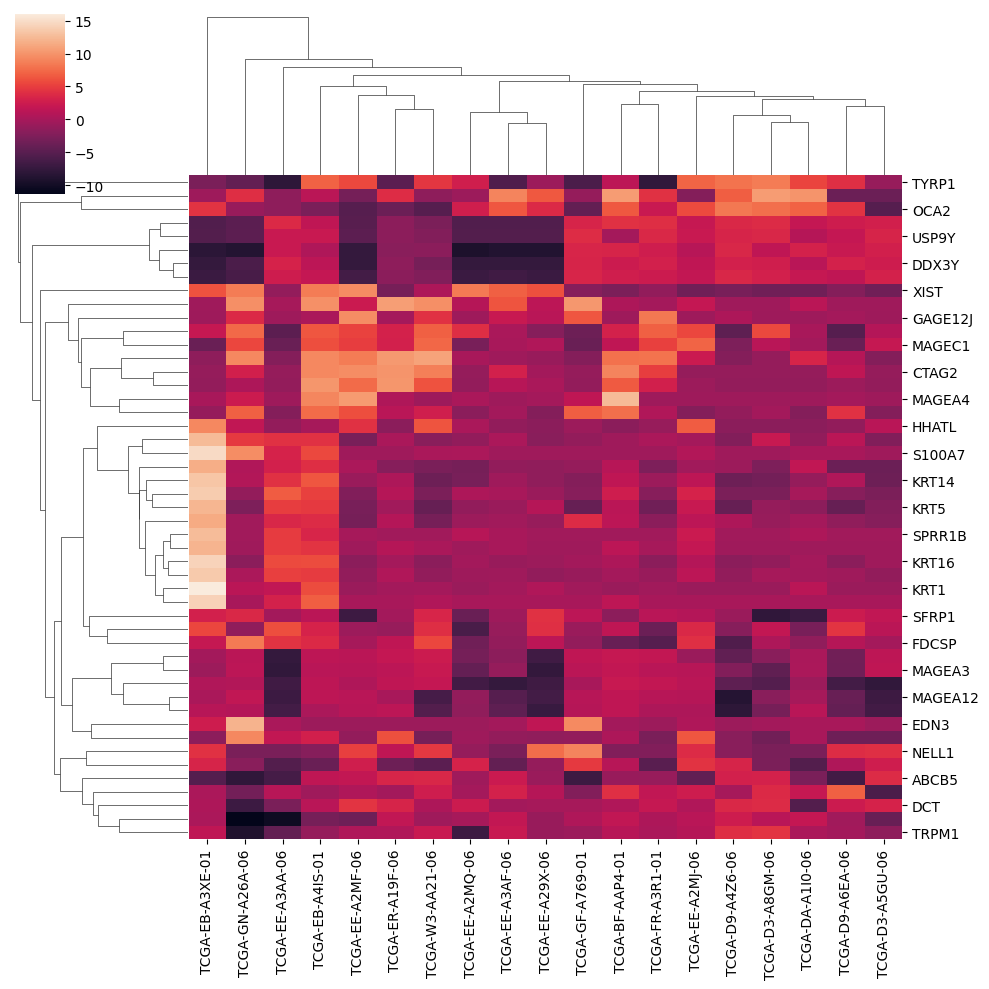

In [ ]:
# Definimos una matriz de expresión mas pequeña para profundizar en su estudio
data = raw_data.iloc[0:49, 0:19]
sns.clustermap(data)

El dendograma se puede estudiar utilizando genes como instancias y muestras como variables. O viceversa.
En los bordes del *hetmap* aparece el dendograma. El arbol relaciona las instancias por su similitud, y esto se refleja en las distancias de las ramas y los perfiles de expresión del *hetmap*. Clusters con distancias entre sus ramas muy cortas tienen perfiles muy homogeneos entre si.

------------------------------------------------------------------------

En el mapa de calor, en el lateral vertical, el tercer grupo que aparece (empezando por arriba) tiene una distancia muy corta entre sus ramas y los perfiles d expresión son muy similares entre ellos. En cambio el cluster central, tiene perfiles más heterogeneos, y las distancias entre las ramas son mayores.

-------------------------------------------------------------------------

El primer grupo que hemos nombrado anteriormente, parece ser el más relevante a la hora de diferenciar las muestras entre sí. De hecho, tomando por dendograma y expresión de genes las muestras de los datos podemos hacer dos agrupaciones diferenciadas. A lo largo del eje horizontal podráimos dividir las muestras de la mitad derecha como **muestras de alto nivel de expresión de los genes** y la mitad izquierda, concretamente, dos tercios de dicha mitad, como **muestras con bajo nivel de expresión de dichos genes**.

### 1.1 Medidas entre las distancias

Existen varios factores a considerar a la hora de realizar dendogramas. Dichos facoters afectan al resultado; los datos y el preprocesamiento alteran las variables y por tanto el resultado será difertente, el algoritmo usado también obtendrá datos diferentes y el tipo de distancia que se mida también tendrá su efecto en el resultado. El proceso anterior ha trabajado con la distancia euclidea, válida para variables numéricas continuas. Pero existen otras distancias.

Text(0.5, 0.98, 'Minkowski')

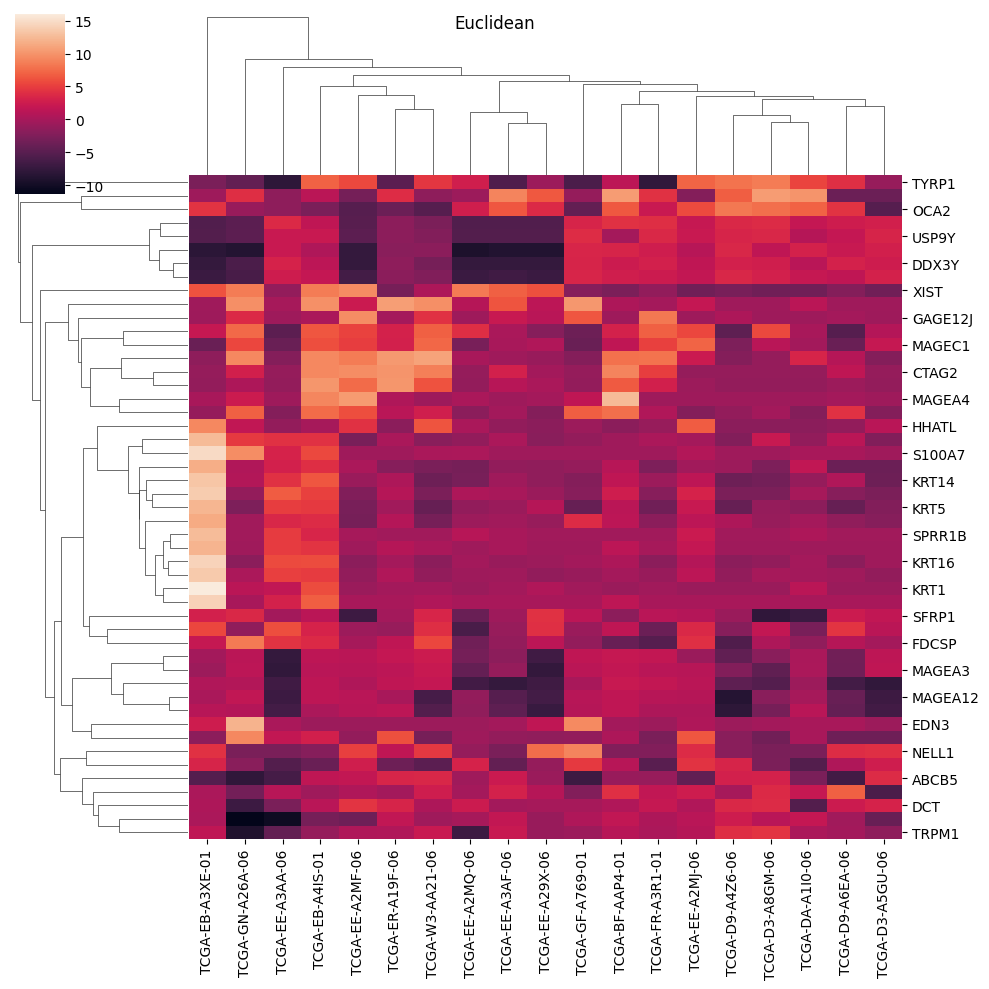

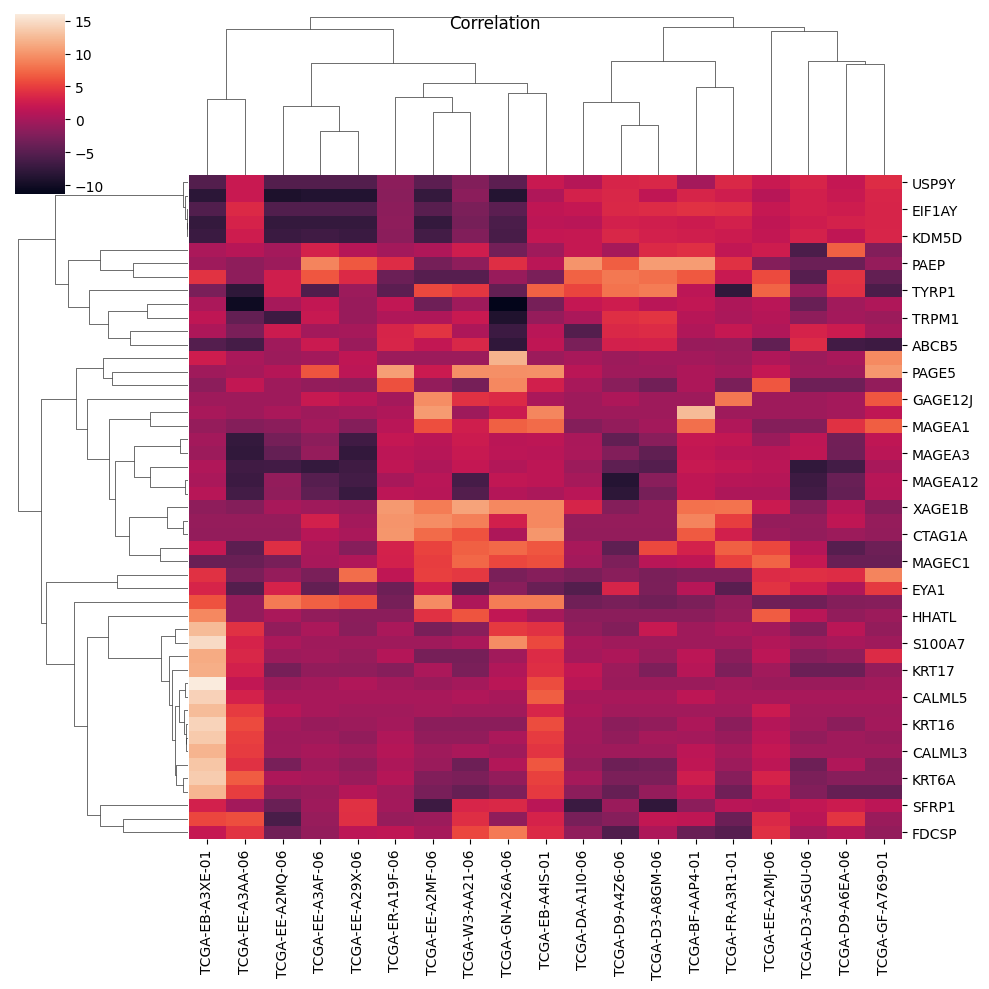

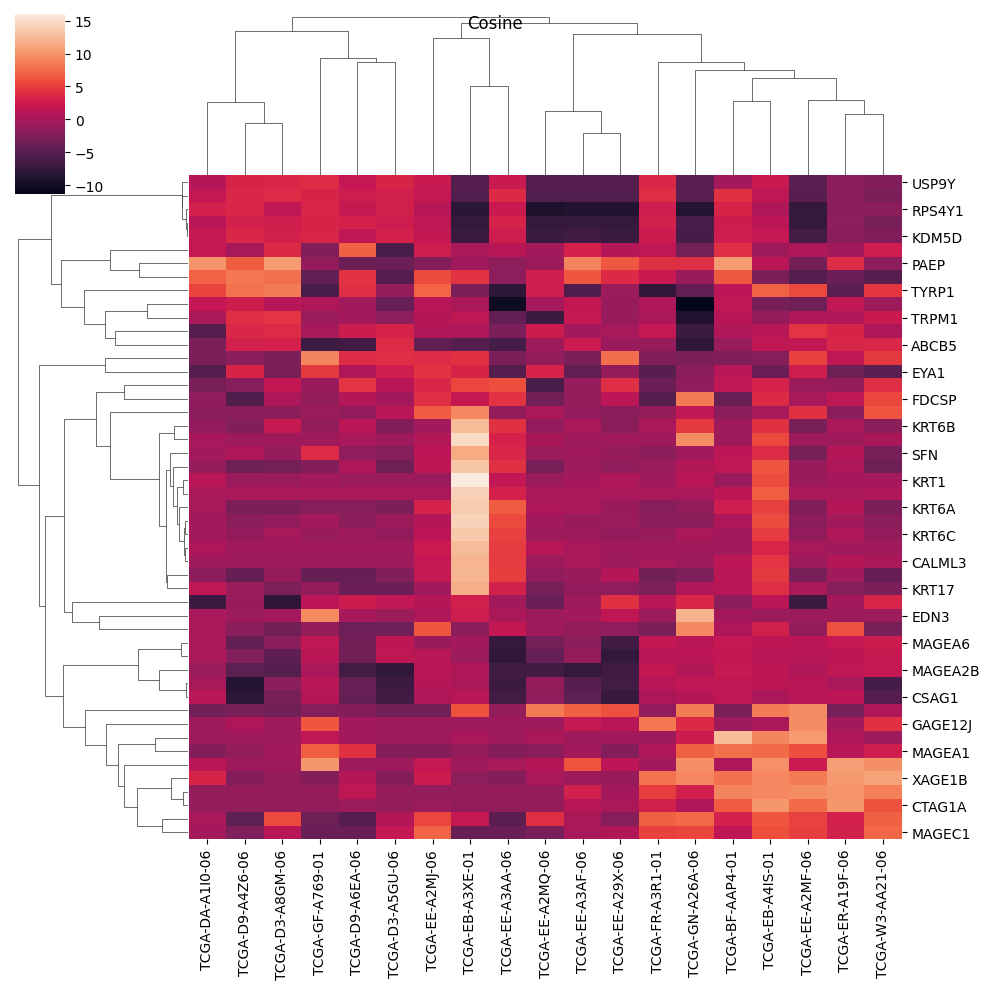

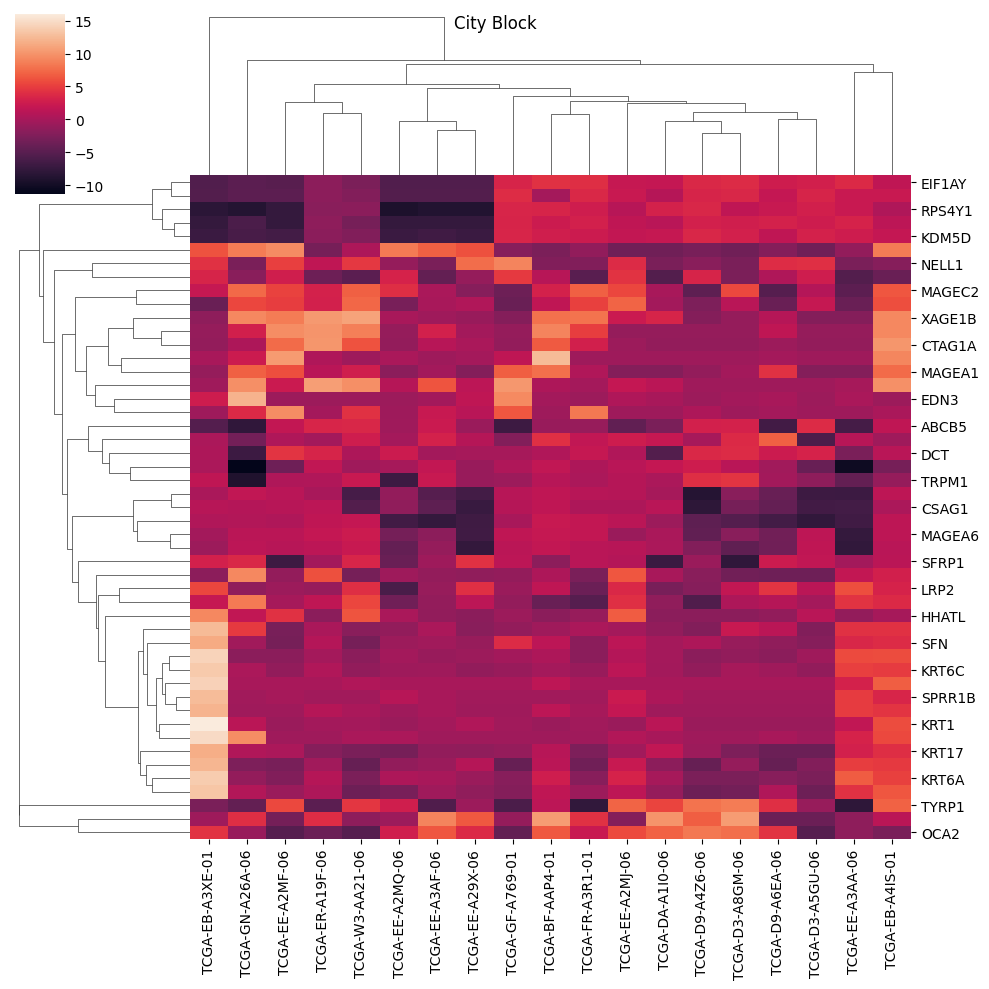

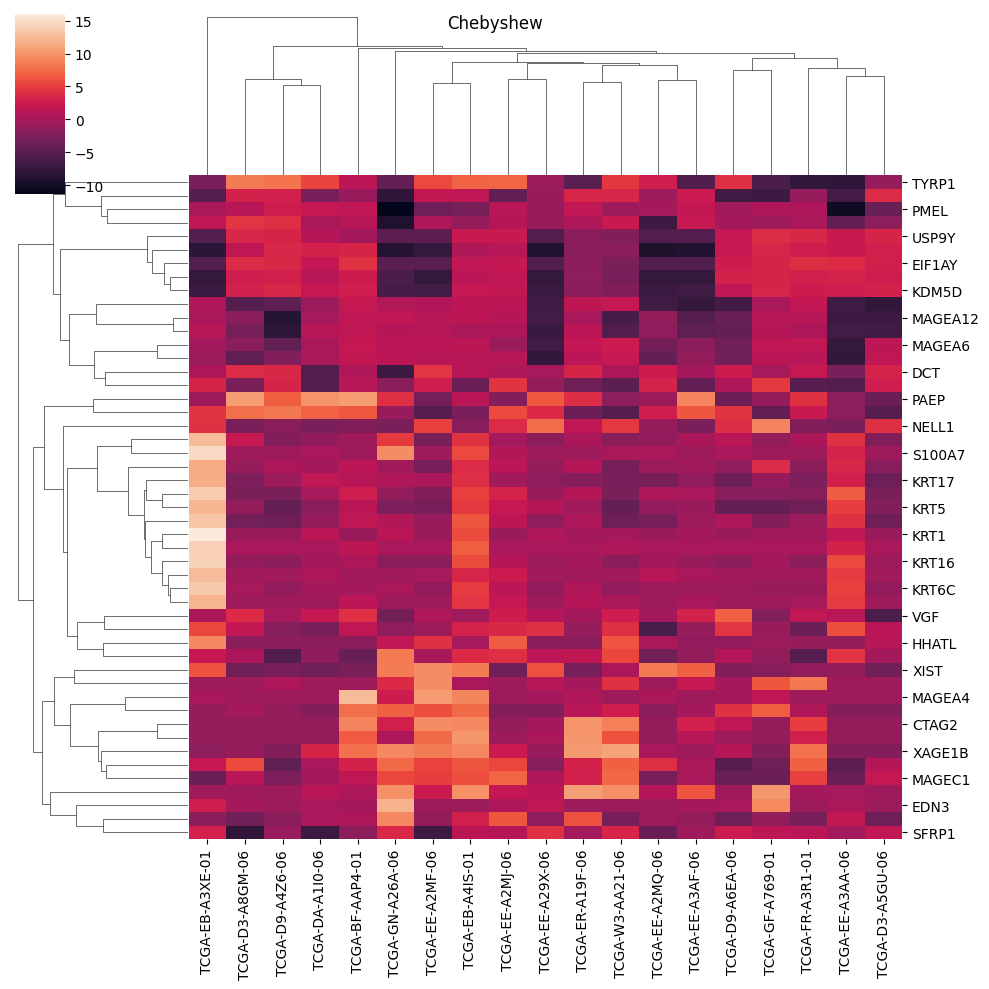

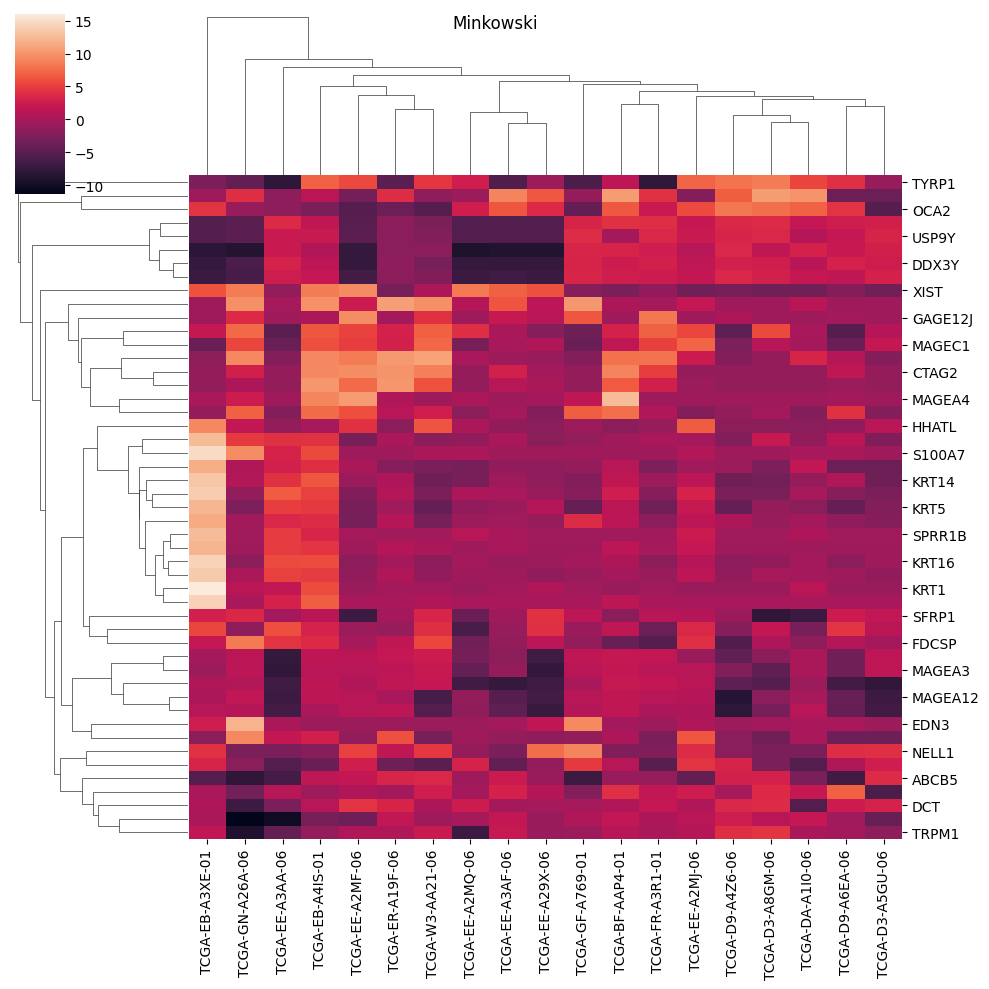

In [ ]:
sns.clustermap(data, metric="euclidean").fig.suptitle('Euclidean')
sns.clustermap(data, metric="correlation").fig.suptitle('Correlation')
sns.clustermap(data, metric="cosine").fig.suptitle('Cosine')
sns.clustermap(data, metric="cityblock").fig.suptitle('City Block')
sns.clustermap(data, metric="chebyshev").fig.suptitle('Chebyshew')
sns.clustermap(data, metric="minkowski").fig.suptitle('Minkowski')

La medida de distancias que más parece corroborar la hipotesis previa de subconjuntos relacionados es la correlación. Dicha medida hace una diferenciación más acusada si cabe que la euclidea. Podemos ver para un grupo de genes (recuadro azul) que parece indicar la diferenciación entre dos estados de todas las muestra, que hay dos grupos de muestras bastante homogeneos, claramente diferenciados por estos genes. Además las ramas del árbol concuerdan bastante bien con dicha diferenciación.
Existe una muestra, en el centro del *heatmap* que aunque por dendograma pertenezca al grupo de muestras de **bajo nivel de expresión** (recuadro negro) está claro que la clasificacióm, atendiendo a este criterio, no es correcta, pues presenta **altos niveles de expresión** recuadro gris. Además los genes más o menos homogeneos para todas las muestras (recuador rosaa) presenta un comportamiento anormal. Puede que la clasificación haya terminado de este modo al englobar todos los genes para todas las muestras. En cualquier caso, esa muestra es una instancia particular que hay que vigilar a lo largo del proceso.



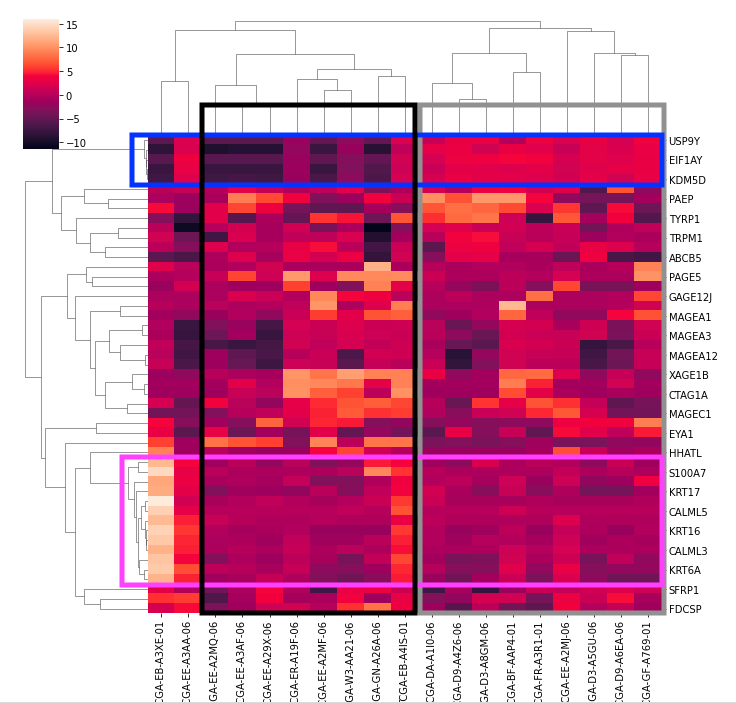

### 1.1.2 Cálculo de distancias
Tras definir el método para calcular las distancias vamos a modificar, para la distancia de correlación, espcificaremos la medida de distancia con la que vamos a trabajar:

* Completa
* Simple
* Promediada

Text(0.5, 0.98, 'Averge')

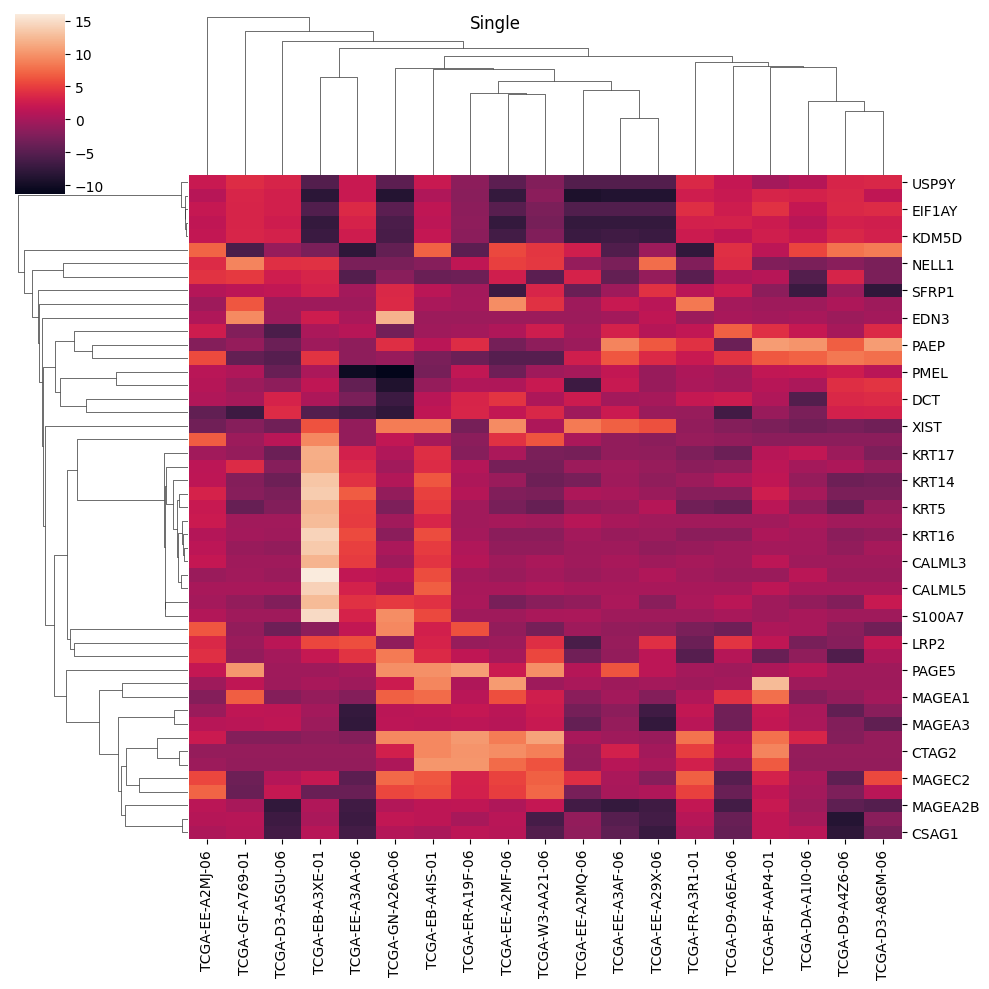

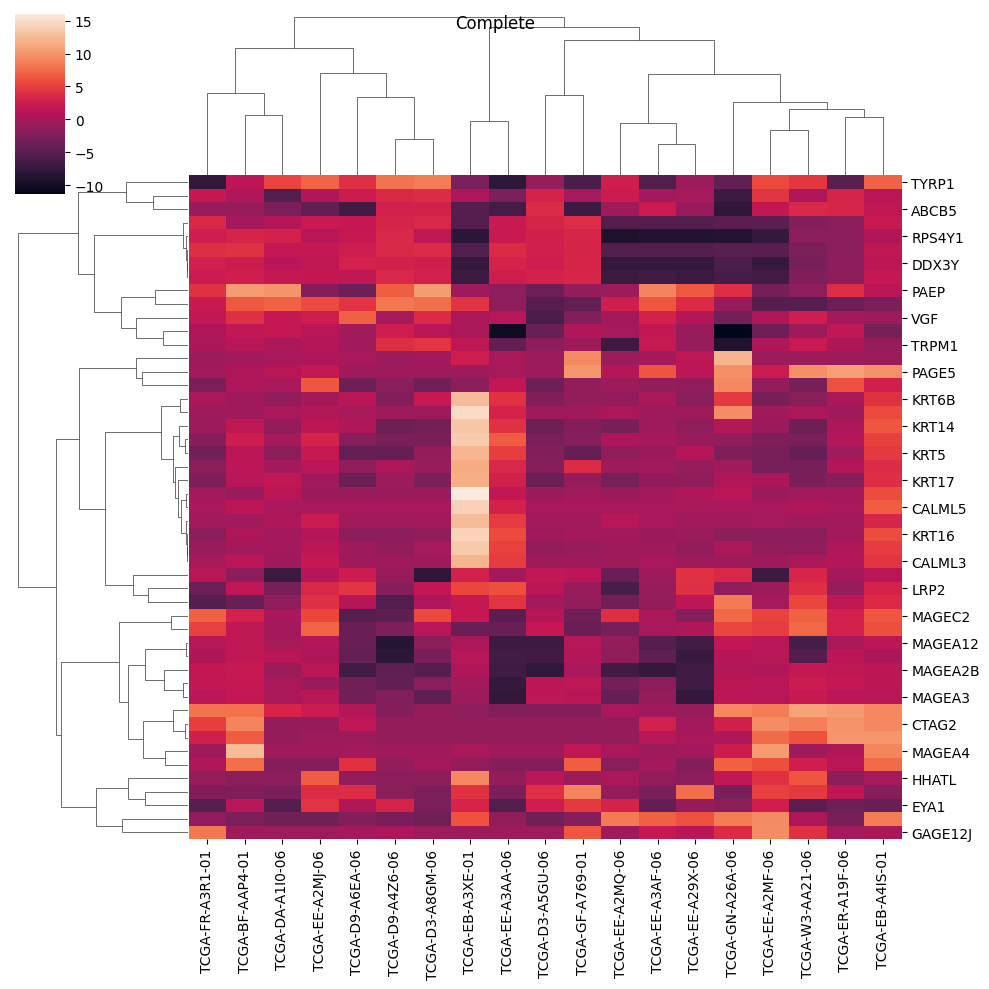

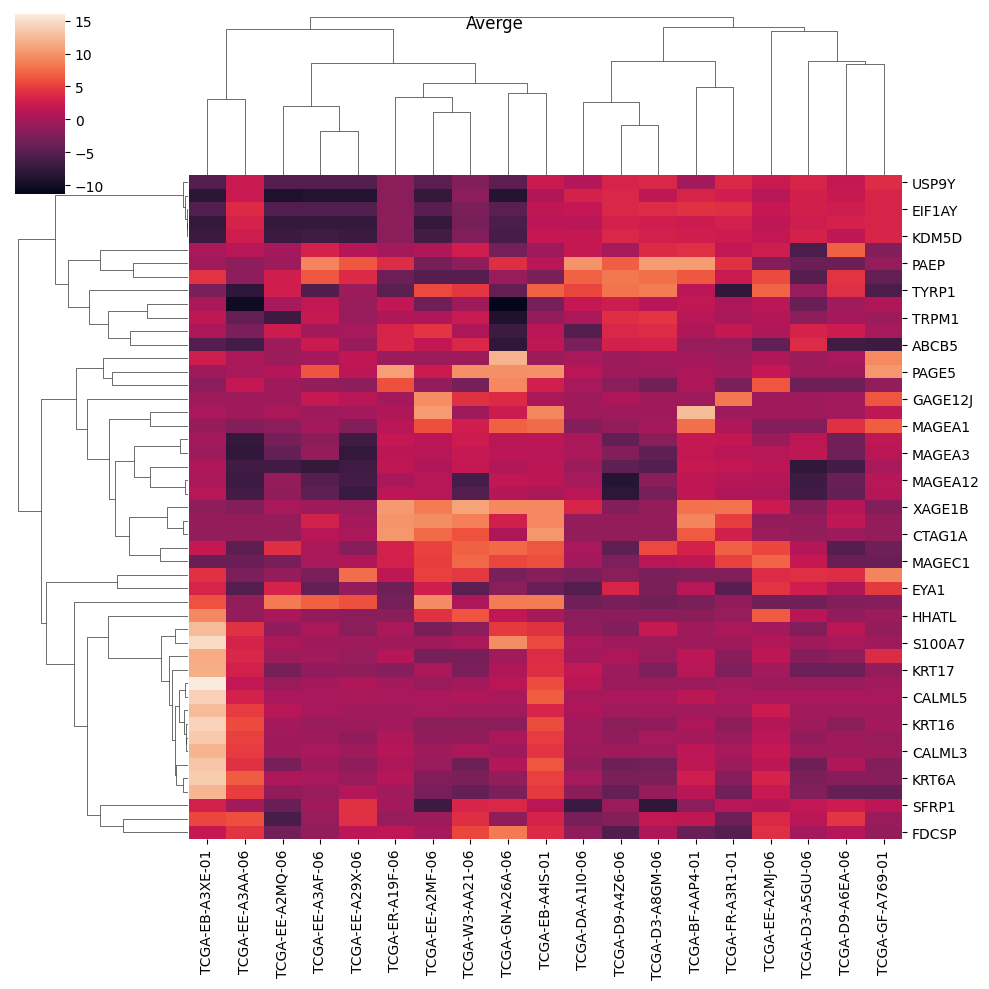

In [ ]:
sns.clustermap(data, metric="correlation", method="single").fig.suptitle('Single')
sns.clustermap(data, metric="correlation", method="complete").fig.suptitle('Complete')
sns.clustermap(data, metric="correlation", method="average").fig.suptitle('Averge')

Entre esto tres últimos *heatmap* ser ve que el mejor resultado lo proporciona el método de promedio para la medida de distancia, que de hecho es el método que surge por defecto en el comando anterior.

Esto destaca la importancia de las variables del proceso. Es decir, el clustering, depende del método de cálculo de distancias y del método que proporcione el valor de la distancia. Por lo que una buena metodología de estudio procuraría aplicar todos las variables a los datos.


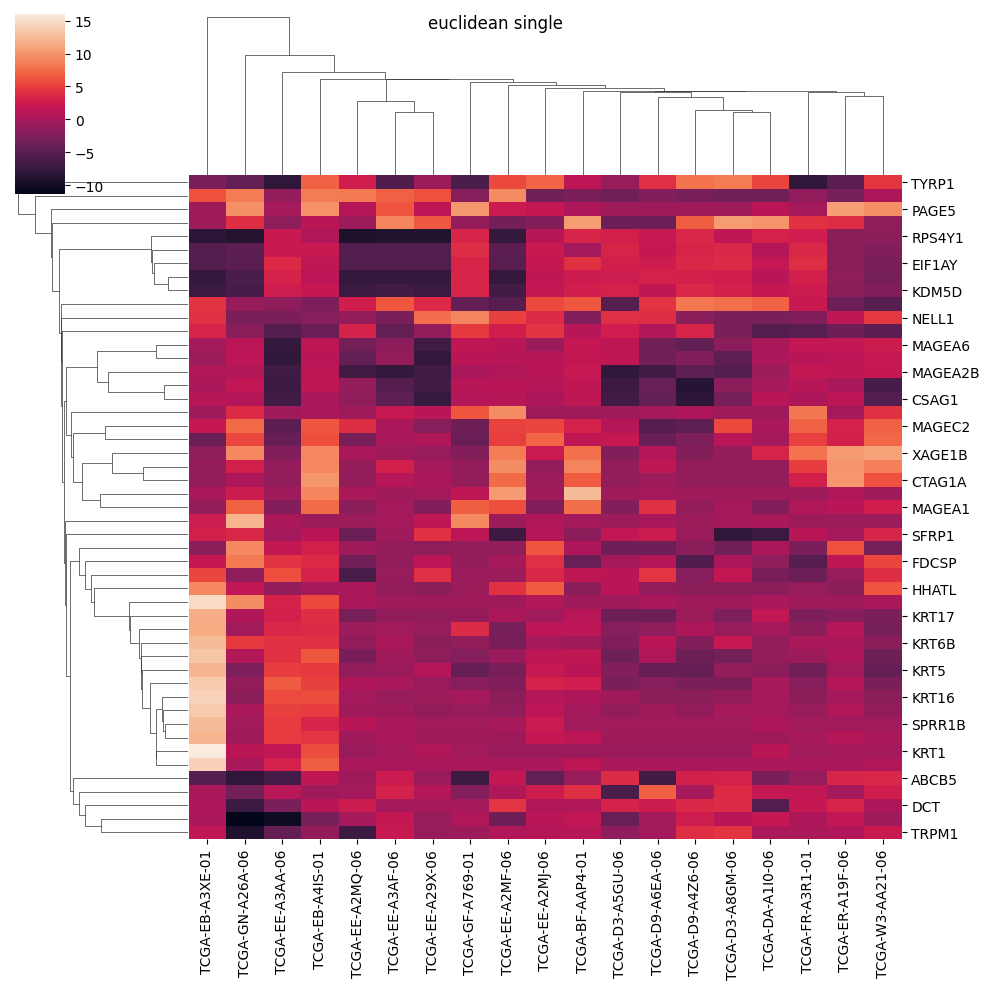

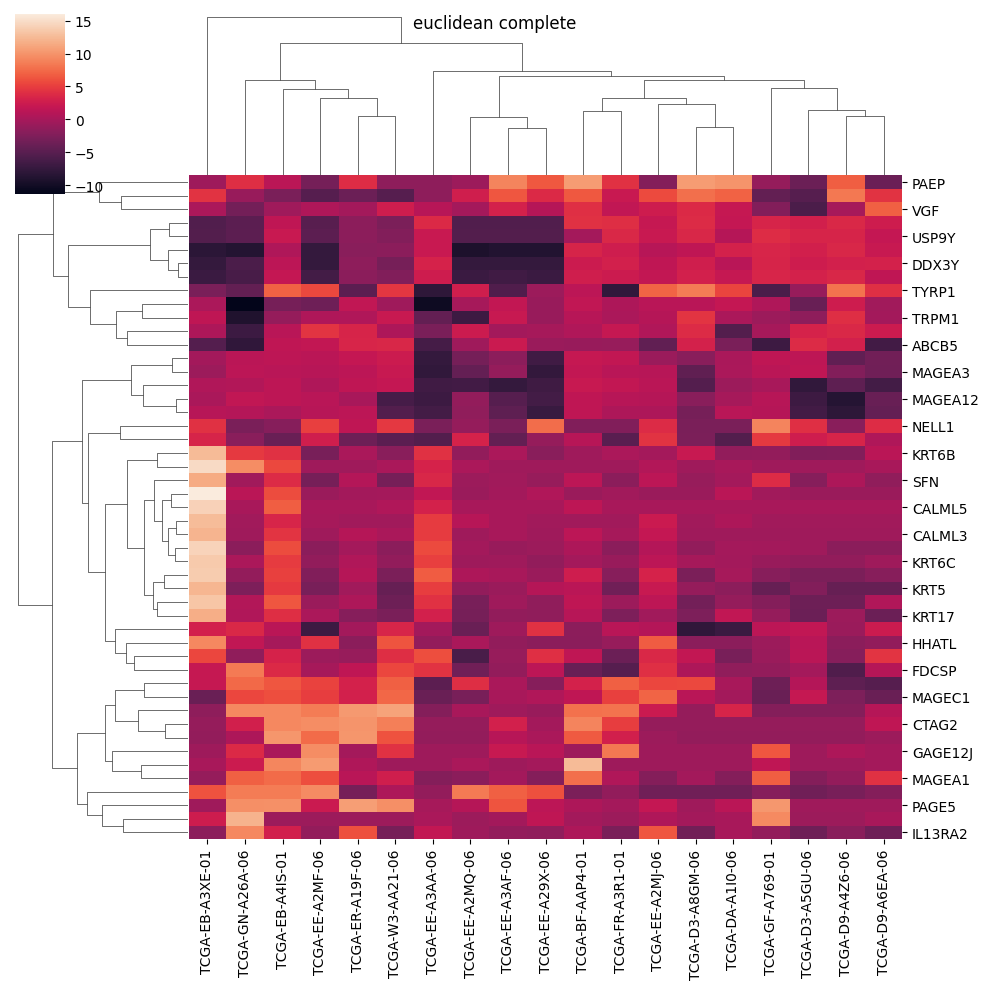

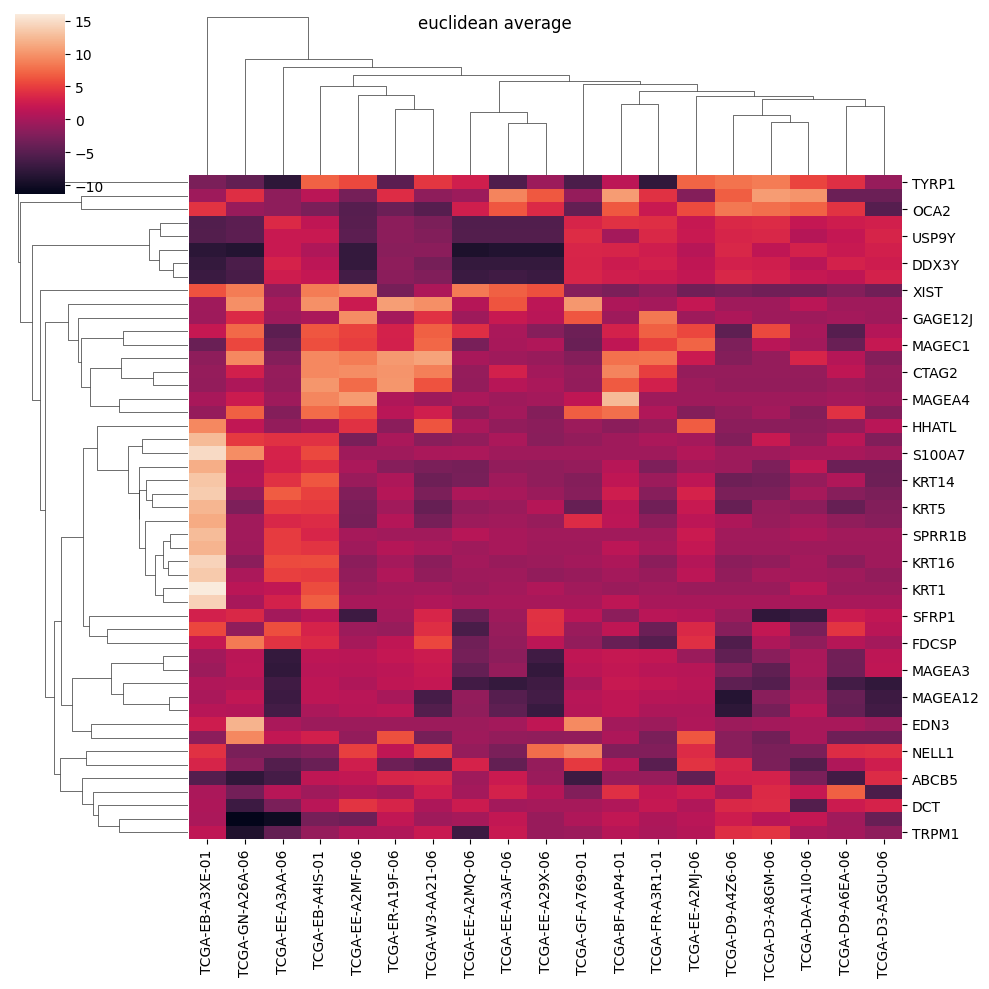

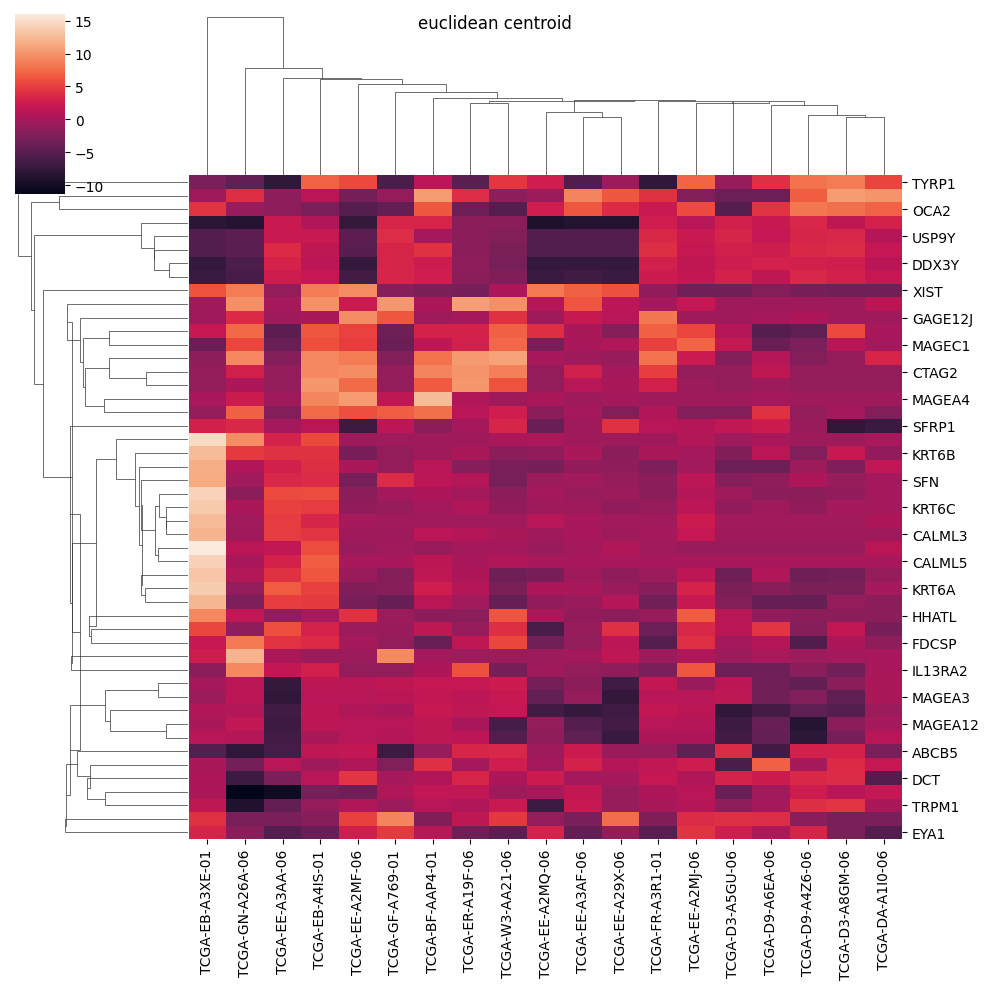

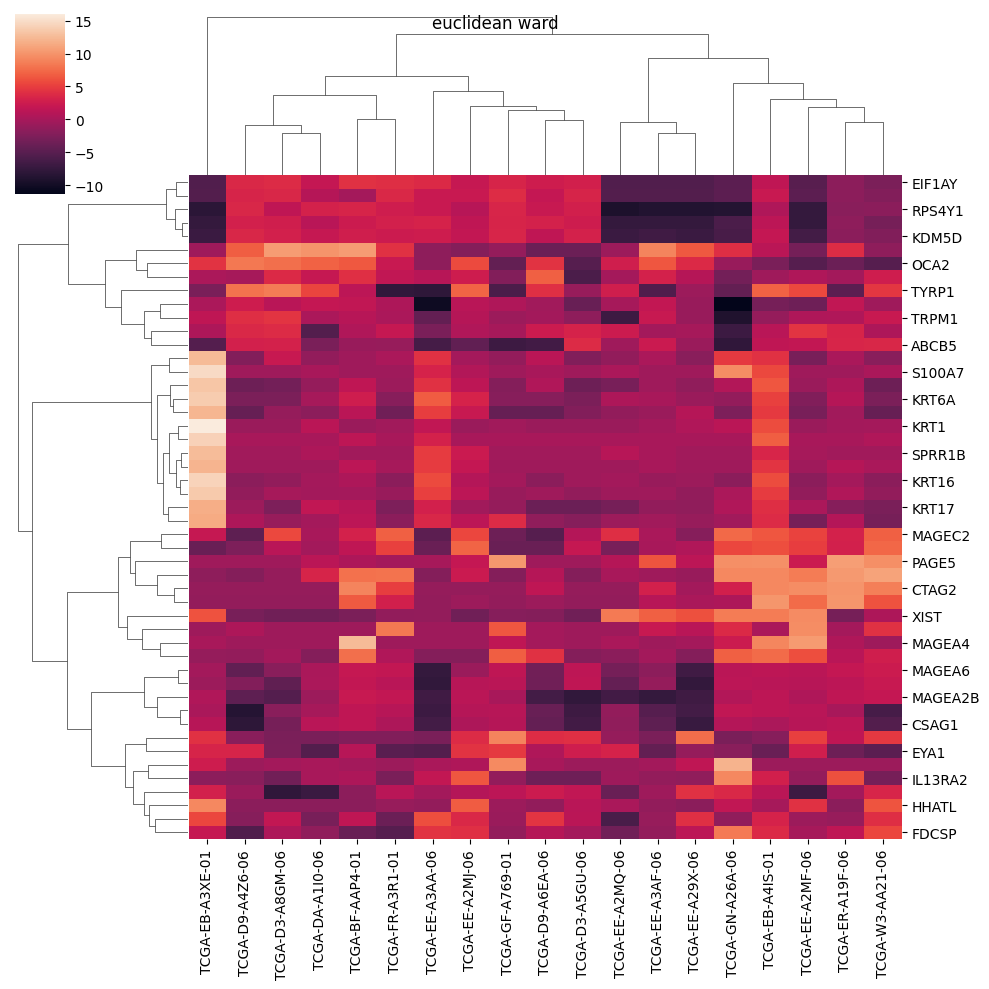

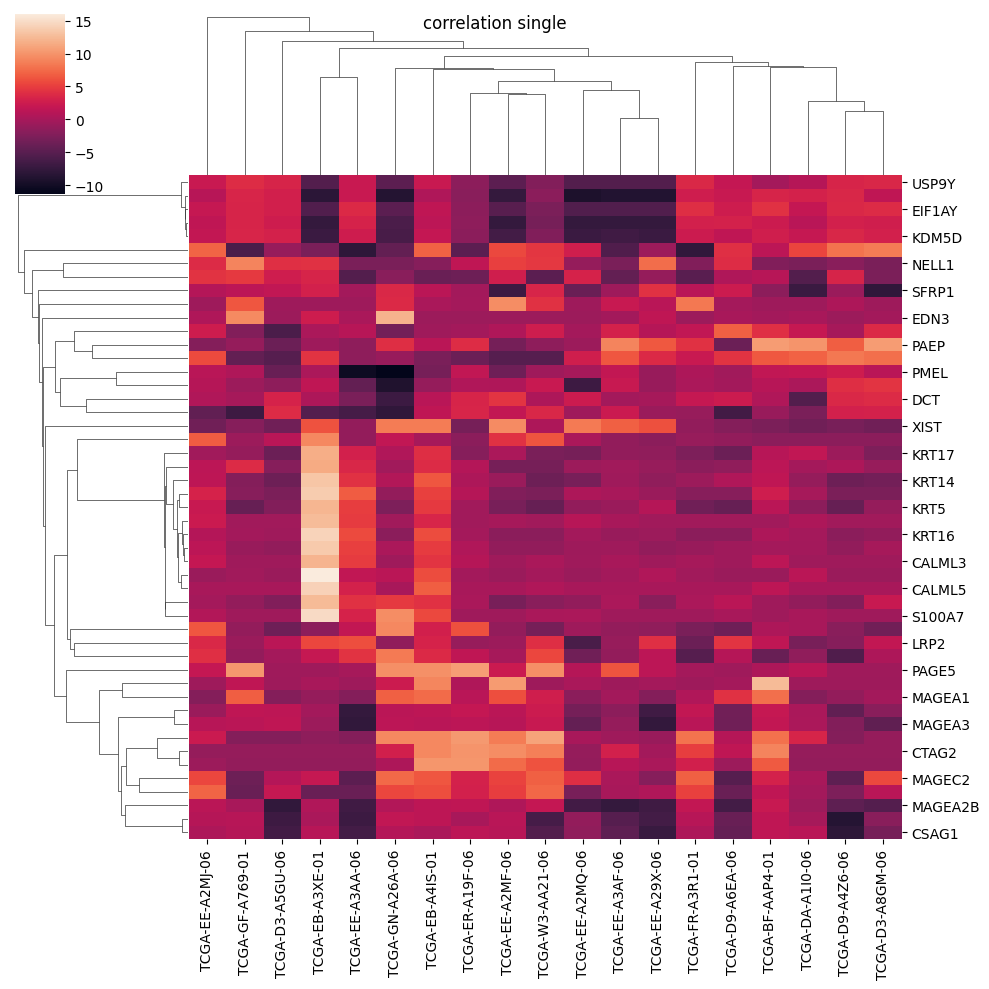

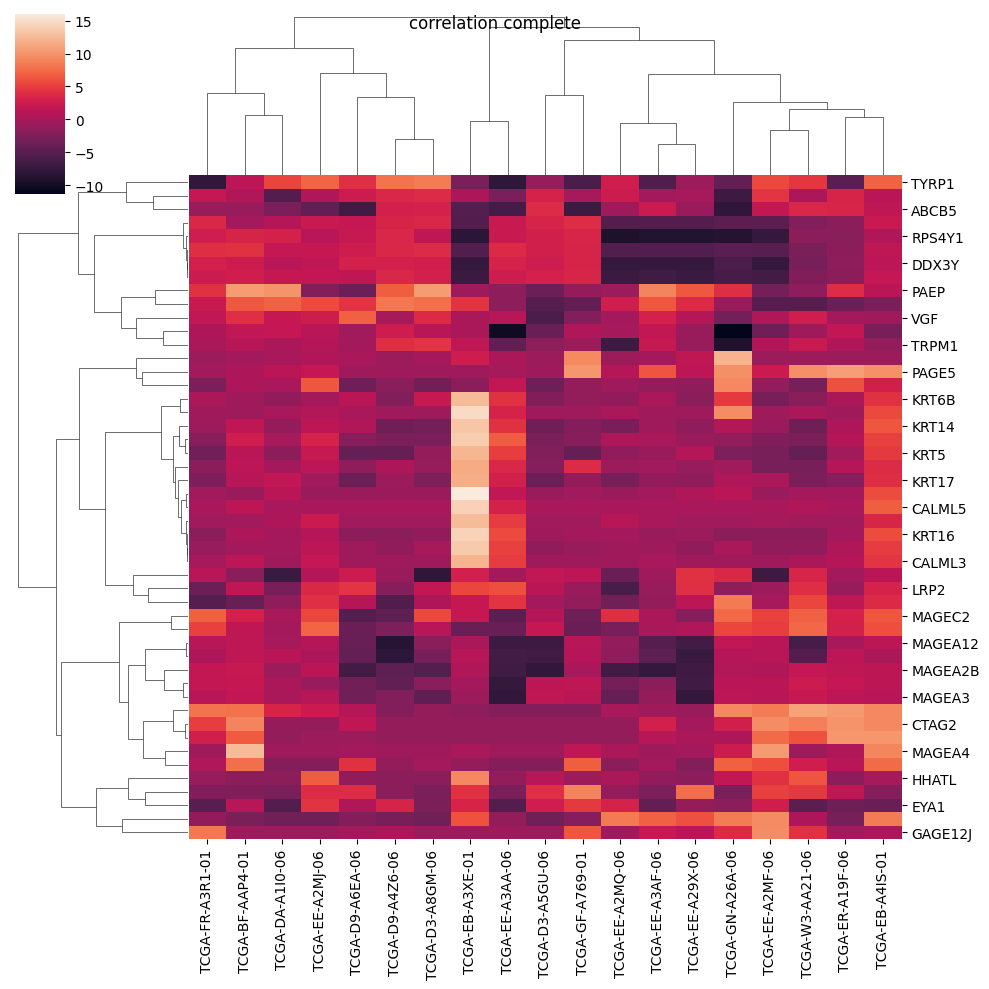

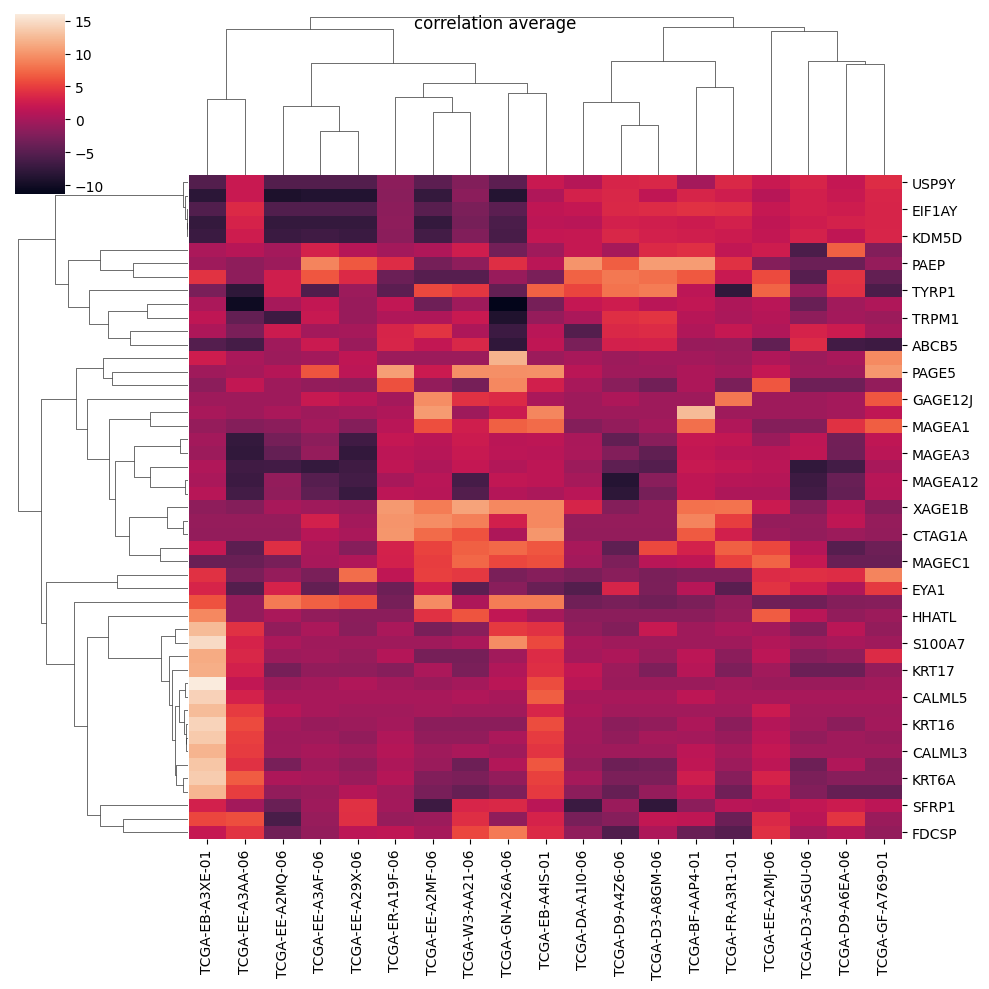

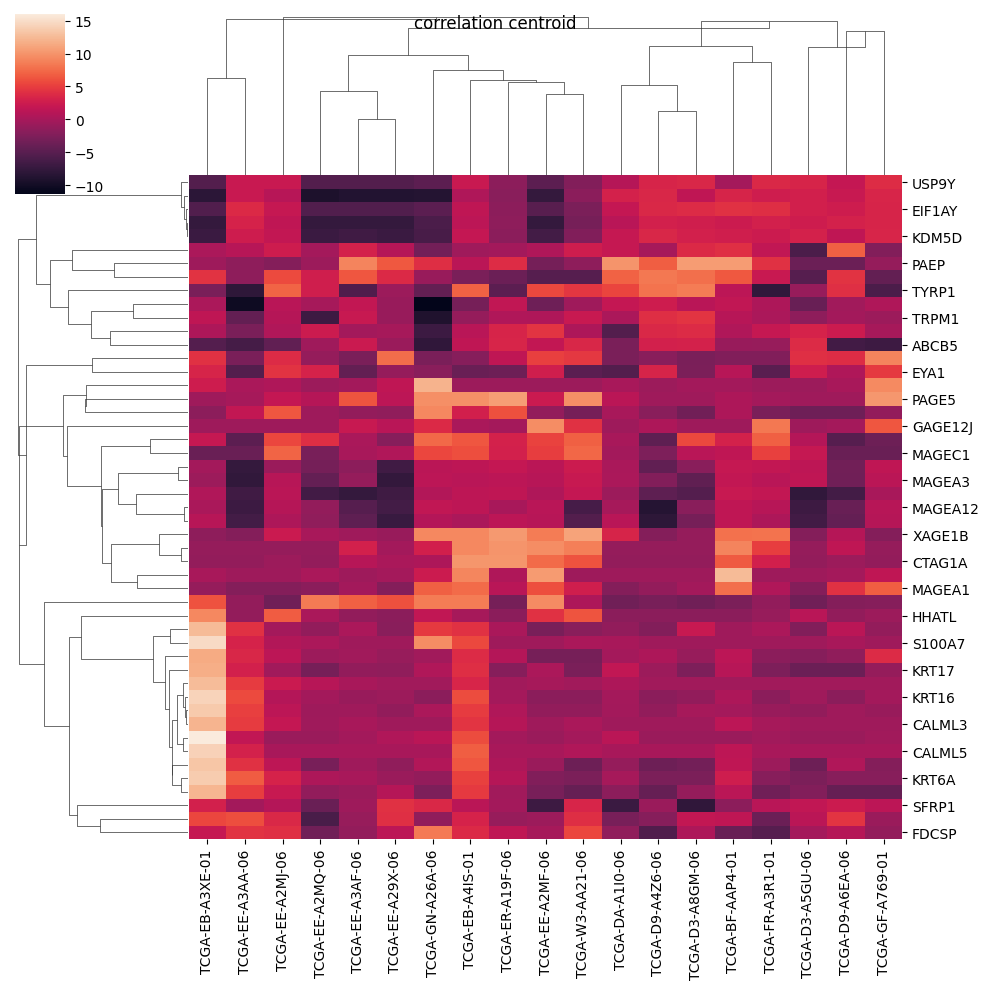

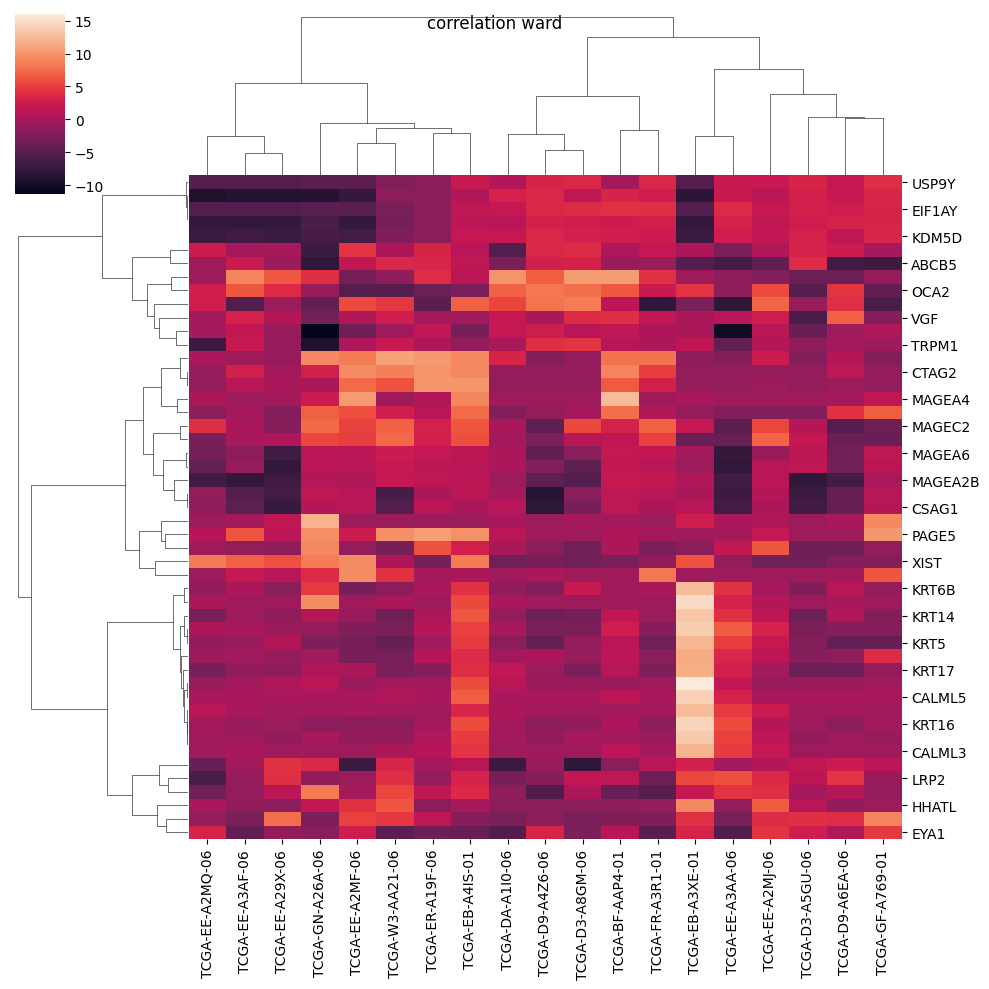

In [ ]:
metrica = ["euclidean", "correlation"]
metodo = ["single","complete","average","centroid","ward"]

for metric in metrica:
  for method in metodo:
      name = metric+" "+method
      sns.clustermap(data,metric = metric, method=method).fig.suptitle(name)






Dado este conjunto de datos, parece que la distancia los métodos de complete y ward proporcionan los mejores resultados visuales. Pero el que ejor puede presentar los datos el el método correlation con la métrica de average. Será el que se utilice posteriormente.

### 1.3 Métodos de evaluación de los clusters obtenidos

Tras una inspección visual de los datos organizados en clusters, dentro de un pequeño grupo toca hacer una evaluación más exahustiva. Para ello vamos a modificar los datos añadiendo parámetros clínicos relevantes, y pintaremos dichos parámetros en los *heatmaps*.

En este caso añadiremos información sobre el tipo de tumor (primario o metastásico) para visualizar la clusterización de la expresión génica con respecto a esta nueva información.

In [ ]:
url_datos = 'https://drive.google.com/uc?id=1ehBCICJrAqm5AUIDXca51IWIoyy-p9FY'

base_datos = pd.read_csv(url_datos, delimiter='\t')

base_datos

definition subtype_RNASEQ.CLUSTER_CONSENHIER  \
TCGA-D9-A4Z6-06A-12R-A266-07  Metastatic                               NaN   
TCGA-EE-A2MQ-06A-11R-A18S-07  Metastatic                               NaN   
TCGA-EE-A3AF-06A-11R-A18S-07  Metastatic                               NaN   
TCGA-ER-A19F-06A-11R-A18S-07  Metastatic                               NaN   
TCGA-EE-A2MF-06A-11R-A21D-07  Metastatic                               NaN   
...                                  ...                               ...   
TCGA-D3-A3MU-06A-11R-A21D-07  Metastatic                               NaN   
TCGA-EE-A2GO-06A-11R-A18S-07  Metastatic                               NaN   
TCGA-FR-A8YC-06A-11R-A37K-07  Metastatic                               NaN   
TCGA-DA-A1I2-06A-21R-A18U-07  Metastatic                               NaN   
TCGA-D3-A2JK-06A-11R-A18S-07  Metastatic                               NaN   

                             subtype_MUTATIONSUBTYPES  
TCGA-D9-A4Z6-06A-12R-A266-07                      NaN  
TCGA-EE-A2MQ-06A-11R-A18S-07                      NaN  
TCGA-EE-A3AF-06A-11R-A18S-07                      NaN  
TCGA-ER-A19F-06A-11R-A18S-07                      NaN  
TCGA-EE-A2MF-06A-11R-A21D-07                      NaN  
...                                               ...  
TCGA-D3-A3MU-06A-11R-A21D-07                      NaN  
TCGA-EE-A2GO-06A-11R-A18S-07                      NaN  
TCGA-FR-A8YC-06A-11R-A37K-07                      NaN  
TCGA-DA-A1I2-06A-21R-A18U-07                      NaN  
TCGA-D3-A2JK-06A-11R-A18S-07                      NaN  

[473 rows x 3 columns]

In [ ]:
tipo_tumor = base_datos.pop("definition") #seleccionamos la variable definition y la almacenamos en una nueva variable
tipo_tumor[0:19] #pintamos los 20 primeros valores a efecto de checkeo

TCGA-D9-A4Z6-06A-12R-A266-07             Metastatic
TCGA-EE-A2MQ-06A-11R-A18S-07             Metastatic
TCGA-EE-A3AF-06A-11R-A18S-07             Metastatic
TCGA-ER-A19F-06A-11R-A18S-07             Metastatic
TCGA-EE-A2MF-06A-11R-A21D-07             Metastatic
TCGA-EE-A2MJ-06A-11R-A18S-07             Metastatic
TCGA-BF-AAP4-01A-11R-A40A-07    Primary solid Tumor
TCGA-D3-A8GM-06A-11R-A37K-07             Metastatic
TCGA-GN-A26A-06A-11R-A18T-07             Metastatic
TCGA-EB-A3XE-01A-12R-A239-07    Primary solid Tumor
TCGA-DA-A1I0-06A-11R-A20F-07             Metastatic
TCGA-FR-A3R1-01A-11R-A239-07    Primary solid Tumor
TCGA-EE-A3AA-06A-11R-A18S-07             Metastatic
TCGA-W3-AA21-06A-11R-A38C-07             Metastatic
TCGA-D9-A6EA-06A-11R-A311-07             Metastatic
TCGA-D3-A5GU-06A-11R-A27Q-07             Metastatic
TCGA-EE-A29X-06A-11R-A18T-07             Metastatic
TCGA-EB-A4IS-01A-21R-A266-07    Primary solid Tumor
TCGA-GF-A769-01A-32R-A32P-07    Primary solid Tumor
Name: defini

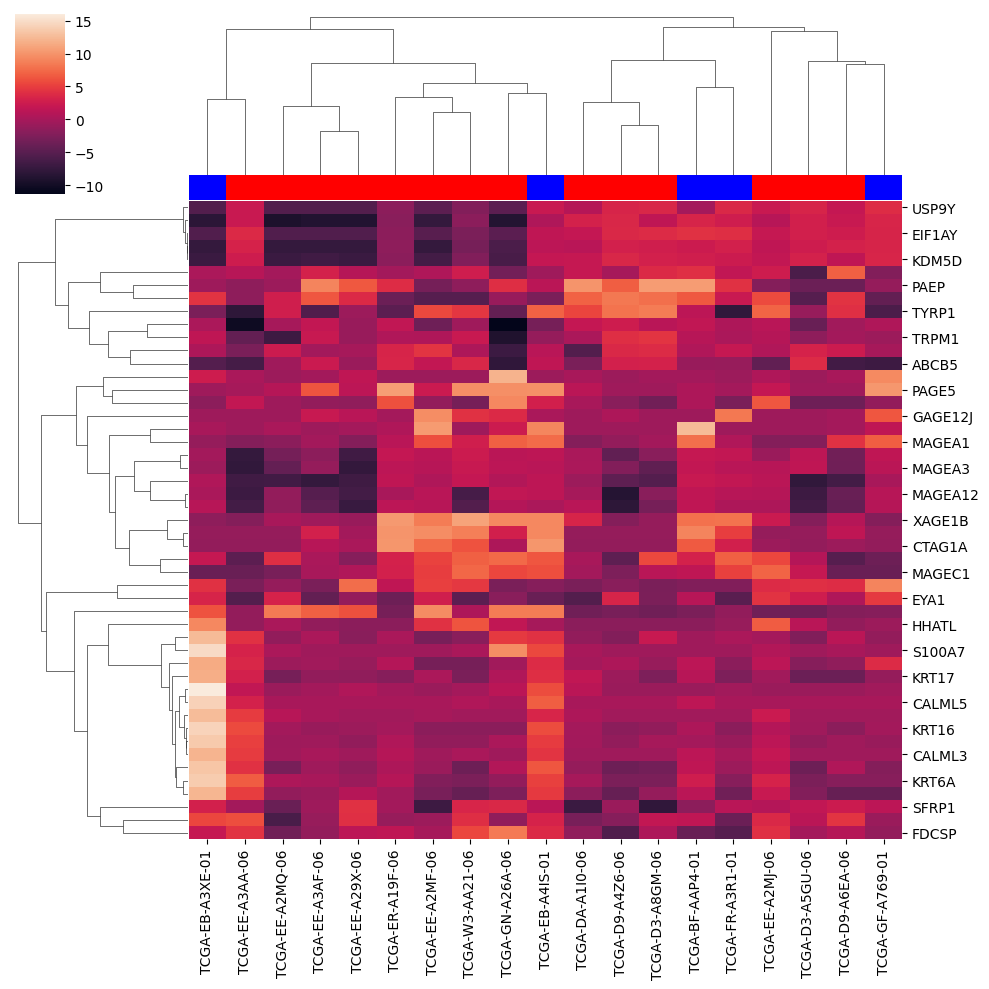

In [ ]:
color_map = dict(zip(tipo_tumor.unique(), "rbgy"))
sample_color = tipo_tumor.map(color_map)
sns.clustermap(data, metric="correlation", method="average", col_colors=list(sample_color[0:19]))

El *heatmap* de los niveles de expresión de los datos no tiene relación aparente, al menos en este subconjunto de datos, con el tipo de tumor. Se realiza el mismo proceso con el conjunto completo de datos.

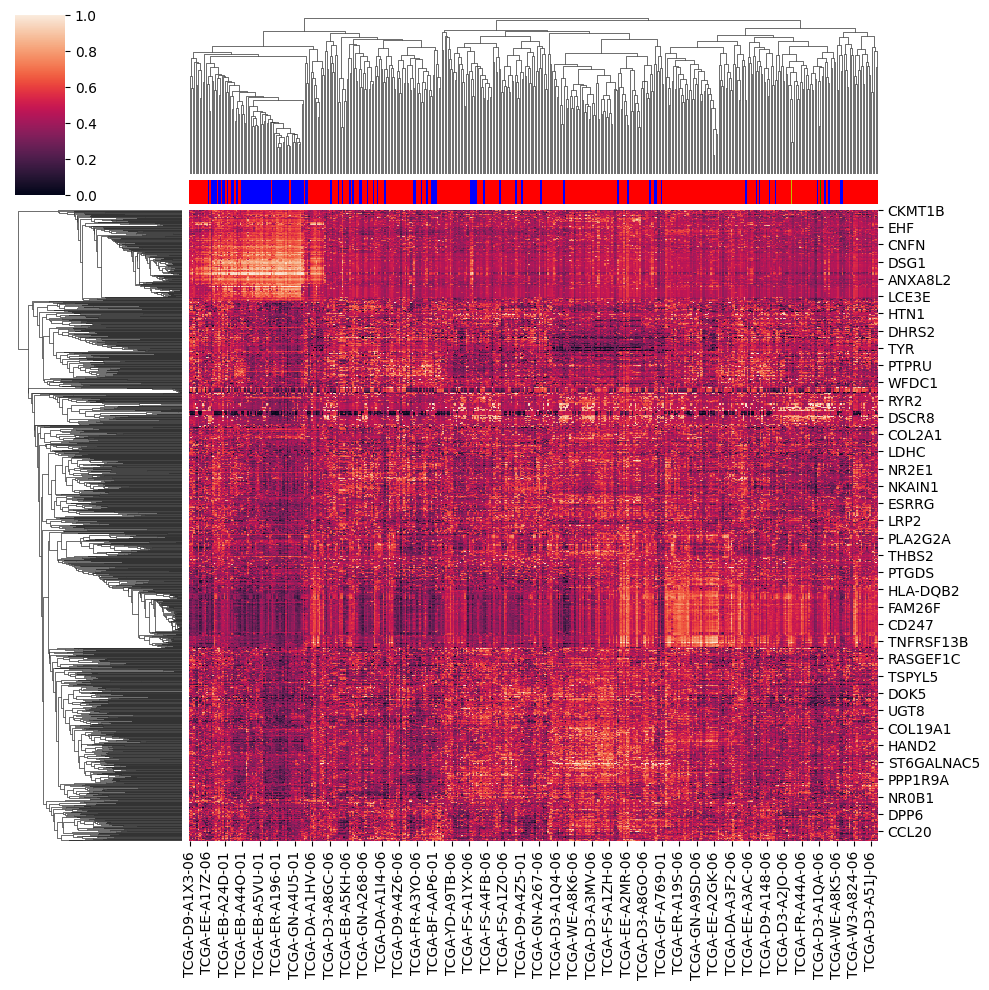

In [ ]:
color_map = dict(zip(tipo_tumor.unique(), "rbgy"))
color_map
sample_color = tipo_tumor.map(color_map)
sns.clustermap(raw_data, metric="correlation", method="average", col_colors=list(sample_color), standard_scale=1) #este proceso requiere de la normalización de los datos (stadard scale a las columnas) para que no de problemas.

## 2. Clustering por particionamiento: Algoritmo K-medias

Esta técnica de agrupamiento permito organizar los datos en k grupos. Cada grupo es un centroide (un nuevo objeto, que representa las características de un grupo de instancias cuya distnacia es mínima entre ellas) y se diferencia del resto de centroides. El *centroide* es un objeto interesante para el estudio, sin embargo, el proceso requiere conocer el número de grupos adecuado para su organización.

El proceos de clustering por k-medias sólo puede considerar una variable de la instancia (o muestras o genes) no podrá, como en el caso anterior, mostrar ambos parámetros.

Los datos están organizados como muestras con niveles de expresión de genes. Por lo que un Clustering de muestras requeriría trasponer la matriz.

Inicialmente trabajaremos conun pequeño conjunto de datos.

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing

# 1- Definimos el algoritmo a emplear y sus parámetros.
k_means = KMeans(n_clusters=3)

# 2- Aplicamos el modelo de algoritmo definido en k_means sobre "datos"
datos = data.transpose()
cluster_predict = k_means.fit_predict(datos)

# 3- Ponemos el resultado en una tabla para que sea más cómodo de manejar
clusters = pd.DataFrame(cluster_predict,index=datos.index,columns=['cluster'])

clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
TCGA-D9-A4Z6-06        0
TCGA-EE-A2MQ-06        2
TCGA-EE-A3AF-06        2
TCGA-ER-A19F-06        2
TCGA-EE-A2MF-06        2
TCGA-EE-A2MJ-06        0
TCGA-BF-AAP4-01        0
TCGA-D3-A8GM-06        0
TCGA-GN-A26A-06        2
TCGA-EB-A3XE-01        1
TCGA-DA-A1I0-06        0
TCGA-FR-A3R1-01        0
TCGA-EE-A3AA-06        0
TCGA-W3-AA21-06        2
TCGA-D9-A6EA-06        0
TCGA-D3-A5GU-06        0
TCGA-EE-A29X-06        2
TCGA-EB-A4IS-01        2
TCGA-GF-A769-01        0

La tabla nos indica al grupo al que pertenece cada muestra, para ver un resultado resumido:

In [ ]:
print("Tamaño de cada cluster:")
size=clusters['cluster'].value_counts()
size

Tamaño de cada cluster:


cluster
0    10
2     8
1     1
Name: count, dtype: int64

<Axes: >

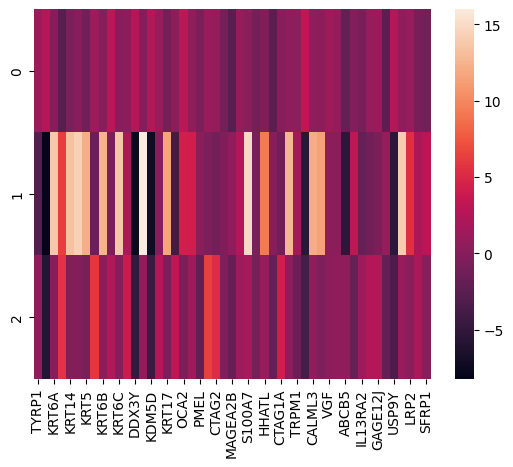

In [ ]:
#Pintamos un heatmap con los distintos niveles de expresión para unos grupos dados por el algoritmo del cluster
centers = pd.DataFrame(k_means.cluster_centers_,columns=list(datos))
sns.heatmap(centers)

Este resultado concreto de agrupaciones  depende de unos valores aleatorios que inicial el proceso de asociación, la repetición de este proceso en diferentes intentos da resultados distintos.

### 2.1 Cálculo y estimación del valor K óptimo

Está claro que el valor de K tiene un importante peso en el estudio del problema por asociación de grupos. Este valor determina el número de grupos y la información que podemos obtener del proceso.

Existen un par de métricas que nos pewermiten obtener un valor k óptimo, el índice de Sliueta y la métrica de Calinski-Harabasz.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

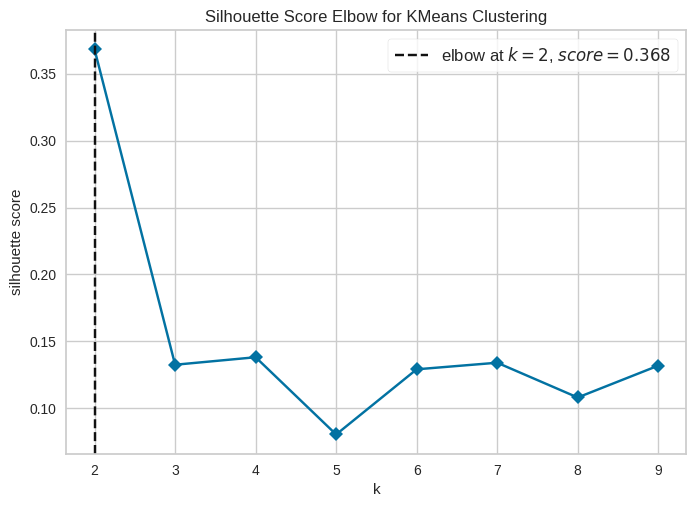

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer


datos = data.transpose()

modelo = KMeans()
visualizer = KElbowVisualizer(modelo, k=(2,10), metric='silhouette', timings=False, locate_elbow=True)
visualizer.fit(datos)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

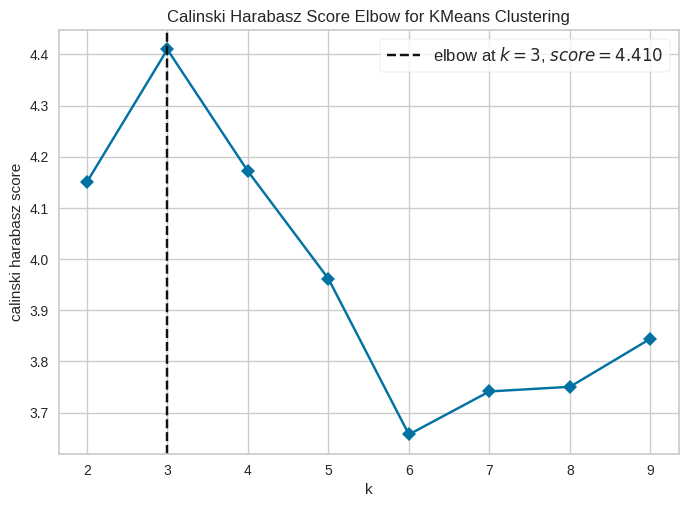

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
visualizer = KElbowVisualizer(modelo, k=(2,10), metric='calinski_harabasz', timings=False, locate_elbow=True)
visualizer.fit(datos)
visualizer.show()

Gráficamente se aprecia que el número de grupos ideales oscila entre 3 y 2.
Calcular la bondad del ajuste según un resultado concreto se puede realizar con el siguiente código.

In [ ]:
from math import floor

# 1- Hacemos el clustering
k_means = KMeans(n_clusters=3)
datos = data.transpose()
cluster_predict = k_means.fit_predict(datos)

# 2- Con el resultado del cluster (cluster_predict) calculamos los índices Silueta y Calinski-Harabasz para ese resultado
indice_Silueta = metrics.silhouette_score(datos, cluster_predict)
print("Índice Silueta: "+str(indice_Silueta))
indice_CH = metrics.calinski_harabasz_score(datos, cluster_predict)
print("Índice Calinski-Harabasz: "+ str(indice_CH))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Índice Silueta: 0.1172107039260456
Índice Calinski-Harabasz: 4.113775564343706


#### Aplicación al dataset completo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

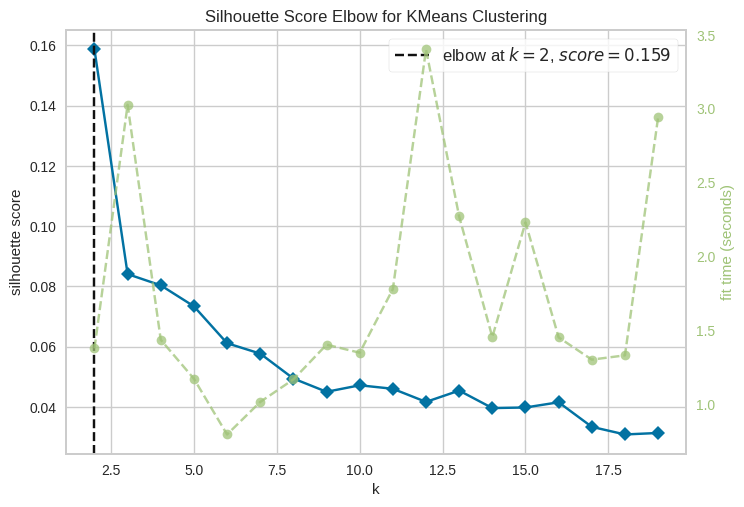

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer


datos = raw_data.transpose()

modelo = KMeans()

visualizer = KElbowVisualizer(modelo, k=(2,20), metric='silhouette', timings=True, locate_elbow=True) #añadimos timings True para que nos pinte los recursos computacionales en tiempo
visualizer.fit(datos)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

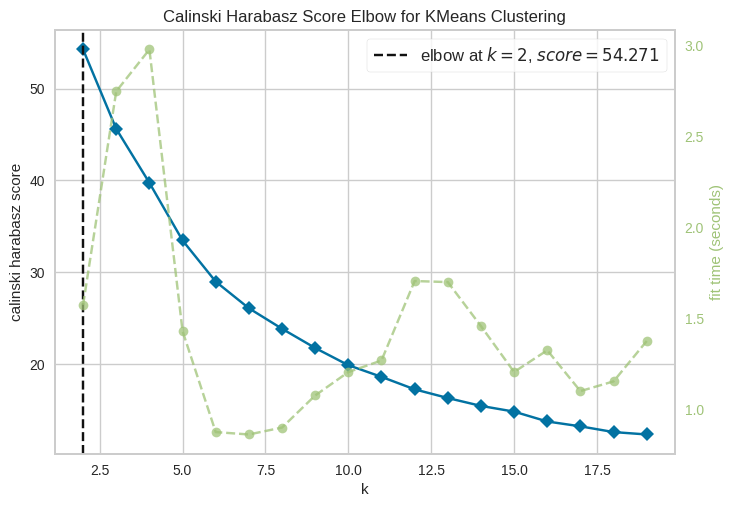

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [ ]:
visualizer = KElbowVisualizer(modelo, k=(2,20), metric='calinski_harabasz', timings=True, locate_elbow=True)
visualizer.fit(datos)
visualizer.show()

Para el dataset completo, perece que el agrupamiento a 2 grupos es lo más efectivo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tamaño de cada cluster:
cluster
1    403
0     70
Name: count, dtype: int64


<Axes: >

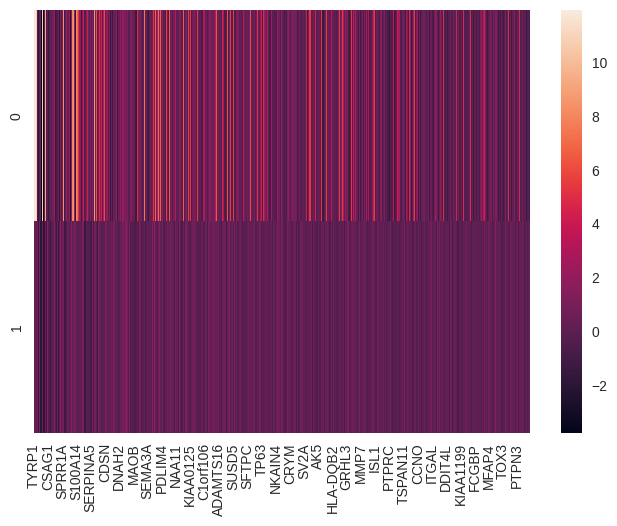

In [ ]:
k_means = KMeans(n_clusters=2)
datos = raw_data.transpose()
cluster_predict = k_means.fit_predict(datos)
clusters = pd.DataFrame(cluster_predict,index=datos.index,columns=['cluster'])

print("Tamaño de cada cluster:")
size=clusters['cluster'].value_counts()
print (size)

centers = pd.DataFrame(k_means.cluster_centers_,columns=list(datos))
sns.heatmap(centers)

## 2.2 Detección de valores outliers

Se puede hacer una detección y eliminación de los valores
*outliers* antes de generar el heatmap.

In [ ]:
# ejecución normal
sns.clustermap(mexraw_data, metric="correlation", method="average")
# ejecución utilizando detección de outliers
sns.clustermap(raw_data, metric="correlation", method="average", robust=True)